<a href="https://colab.research.google.com/github/FadQode/teks-emo-analysis/blob/main/Dataset_Splitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

read README if stuck, it mights help

# Dataset Management

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from google.colab import userdata
from sklearn.model_selection import train_test_split
HF_SECRET = userdata.get('HF_SECRET')

In [ ]:
# Load dataset pertama
df1 = pd.read_parquet("hf://datasets/Alauddin-Ali/emotion_sentiment_dataset/data/train-00000-of-00001.parquet")

# Load dataset kedua
splits = {'train': 'train_data.csv', 'validation': 'val_data.csv', 'test': 'test_data.csv'}
df2 = pd.read_csv("hf://datasets/elvanromp/emosi_tweet/" + splits["train"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     3432 non-null   object
 1   emotion  3432 non-null   object
dtypes: object(2)
memory usage: 53.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3867 non-null   object
 1   label   3867 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.6+ KB
None


In [ ]:
df2["label"].value_counts()


,count
label,
1,1165
3,632
4,622
0,529
5,476
2,443


In [ ]:
df1["emotion"].value_counts()


,count
emotion,
sadness,572
anger,572
love,572
fear,572
joy,572
surprise,572


In [ ]:
emotion_label = {
    'anger': 4,
    'fear': 5,
    'joy': 2,
    'love': 3,
    'sadness': 0,
    'surprise': 1
    }

df1['emotion'] = df1['emotion'].map(emotion_label).astype(int)
df2.rename(columns={"label": "emotion"}, inplace=True,)


In [ ]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     3432 non-null   object
 1   emotion  3432 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 53.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     3867 non-null   object
 1   emotion  3867 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.6+ KB
None


In [ ]:
emotions = df1.groupby('emotion').size() + df2.groupby('emotion').size()
print(emotions)

emotion
0    1101
1    1737
2    1015
3    1204
4    1194
5    1048
dtype: int64


In [ ]:
df1_train, df1_temp = train_test_split(df1, test_size=0.15, random_state=42, stratify=df1['emotion'])
df1_val, df1_test = train_test_split(df1_temp, test_size=0.5, random_state=42, stratify=df1_temp['emotion'])

In [ ]:
df2_val = pd.read_csv("hf://datasets/elvanromp/emosi_tweet/" + splits["validation"])
df2_test = pd.read_csv("hf://datasets/elvanromp/emosi_tweet/" + splits["test"])

In [ ]:
df2_val.rename(columns={"label": "emotion"}, inplace=True,)
df2_test.rename(columns={"label": "emotion"}, inplace=True,)

In [ ]:
combined_train = pd.concat([df1_train, df2], ignore_index=True)
combined_val = pd.concat([df1_val, df2_val], ignore_index=True)
combined_test = pd.concat([df1_test, df2_test], ignore_index=True)

In [ ]:
combined_train.info()
combined_val.info()
combined_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6784 entries, 0 to 6783
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     6784 non-null   object
 1   emotion  6784 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 106.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     1547 non-null   object
 1   emotion  1547 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     1547 non-null   object
 1   emotion  1547 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.3+ KB


In [ ]:
combined_train.to_csv("emotion_train.csv", index=False)
combined_val.to_csv("emotion_val.csv", index=False)
combined_test.to_csv("emotion_test.csv", index=False)

In [ ]:
!pip install transformers datasets evaluate scikit-learn torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Ekman Model Label Test to Go Emotion Dataset

In [ ]:
pip install transformers==4.38.2

  Using cached transformers-4.38.2-py3-none-any.whl.metadata (130 kB)
  Using cached tokenizers-0.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached transformers-4.38.2-py3-none-any.whl (8.5 MB)
Using cached tokenizers-0.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.38.2 which is incompatible.


In [ ]:
pip install evaluate datasets pandas torch scikit-learn

In [ ]:
from transformers import pipeline

# Ekman emotion classifier, gunakan GPU jika tersedia
ekman = pipeline('sentiment-analysis', model='arpanghoshal/EkmanClassifier', device=0)

config.json:   0%|          | 0.00/766 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/182 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
from datasets import load_dataset

dataset = load_dataset("go_emotions", "simplified")
# Mapping label ID ke nama label simplified
id2label = dataset['train'].features['labels'].feature.names

# Mapping GoEmotions simplified → Ekman berdasarkan paper & kode resmi Google
go_to_ekman = {
    'admiration': 'joy',
    'amusement': 'joy',
    'anger': 'anger',
    'annoyance': 'anger',
    'approval': 'joy',
    'caring': 'joy',
    'confusion': 'surprise',
    'curiosity': 'surprise',
    'desire': 'joy',
    'disappointment': 'sadness',
    'disapproval': 'anger',
    'disgust': 'disgust',
    'embarrassment': 'sadness',
    'excitement': 'joy',
    'fear': 'fear',
    'gratitude': 'joy',
    'grief': 'sadness',
    'joy': 'joy',
    'love': 'joy',
    'nervousness': 'fear',
    'optimism': 'joy',
    'pride': 'joy',
    'realization': 'surprise',
    'relief': 'joy',
    'remorse': 'sadness',
    'sadness': 'sadness',
    'surprise': 'surprise',
    'neutral': 'neutral'
}

train-00000-of-00001.parquet:   0%|          | 0.00/2.77M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/350k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

In [ ]:
# Ambil contoh subset untuk efisiensi
sample = dataset['test'].select(range(1000))
texts = sample['text']
raw_labels = sample['labels']

# Konversi ke Ekman label (ambil label pertama untuk single-label model)
ekman_labels = []
for label_ids in raw_labels:
    if not label_ids:
        ekman_labels.append('neutral')
    else:
        first_label = id2label[label_ids[0]]
        ekman_labels.append(go_to_ekman.get(first_label, 'neutral'))

In [ ]:
from transformers import pipeline

ekman = pipeline("sentiment-analysis", model="arpanghoshal/EkmanClassifier", device=0)

# Prediksi
preds = ekman(texts)
pred_labels = [p['label'].lower() for p in preds]

Device set to use cuda:0


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

acc = accuracy_score(ekman_labels, pred_labels)
print(f"\n🔍 Akurasi Keseluruhan: {acc:.4f}")

report = classification_report(ekman_labels, pred_labels, digits=3)
print(report)


🔍 Akurasi Keseluruhan: 0.6750
              precision    recall  f1-score   support

       anger      0.640     0.404     0.495       136
     disgust      0.480     0.571     0.522        21
        fear      0.600     0.783     0.679        23
         joy      0.813     0.798     0.806       366
     neutral      0.633     0.688     0.659       301
     sadness      0.590     0.581     0.585        62
    surprise      0.491     0.604     0.542        91

    accuracy                          0.675      1000
   macro avg      0.607     0.633     0.613      1000
weighted avg      0.680     0.675     0.673      1000



# Dialouge Dataset Transfer Learning

In [ ]:
pip install peft==0.10.0

In [ ]:
!pip install --upgrade transformers accelerate

  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
Using cached transformers-4.51.3-py3-none-any.whl (10.4 MB)
Using cached tokenizers-0.21.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2


In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
dataset = load_dataset("li2017dailydialog/daily_dialog")

# Cek fitur kolom
dataset["train"].features

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


{'dialog': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'act': Sequence(feature=ClassLabel(names=['__dummy__', 'inform', 'question', 'directive', 'commissive'], id=None), length=-1, id=None),
 'emotion': Sequence(feature=ClassLabel(names=['no emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise'], id=None), length=-1, id=None)}

In [ ]:
emotion_labels = dataset["train"].features["emotion"].feature.names
print(emotion_labels)

['no emotion', 'anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']


In [ ]:
from datasets import load_dataset

# Load dataset
dataset = load_dataset("Jsevisal/go_emotions_ekman_unilabel")

# Mapping label ke Ekman
ekman_labels = {
    0: 0,  # neutral
    1: 1,  # anger
    2: 2,  # disgust
    3: 3,  # fear
    4: 4,  # joy
    5: 5,  # sadness
    6: 6   # surprise
}

def preprocess(example):
    try:
        return {
            "text": example["dialog"][-1],
            "label": ekman_labels[example["emotion"][0]]
        }
    except:
        return None  # akan difilter nanti

# Apply preprocessing dan filter None
def prepare_split(split):
    return dataset[split].map(preprocess).filter(lambda x: x is not None and x["text"] != "")

train_dataset = prepare_split("train")
val_dataset = prepare_split("validation")
test_dataset = prepare_split("test")


tokenizer = AutoTokenizer.from_pretrained("arpanghoshal/EkmanClassifier")

def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)

train_dataset = train_dataset.map(tokenize, batched=True)
val_dataset = val_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

# Set format to PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])


Map:   0%|          | 0/11118 [00:00<?, ? examples/s]

Filter:   0%|          | 0/11118 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/11118 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("arpanghoshal/EkmanClassifier")

In [ ]:
import numpy as np
import evaluate

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results-ekman-dailydialog",
    do_train=True,
    do_eval=True,
    eval_steps=500,
    save_steps=500,
    logging_dir="./logs",
    logging_steps=50,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    save_total_limit=2
)


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_train_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

<ipython-input-32-b5d1165963f9>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:

trainer.train()

Step,Training Loss
50,1.278300
100,0.484500
150,0.524000
200,0.501700
250,0.478000
300,0.533700
350,0.447100
400,0.524000
450,0.560700
500,0.474800


TrainOutput(global_step=2085, training_loss=0.45517688129159756, metrics={'train_runtime': 898.9745, 'train_samples_per_second': 37.102, 'train_steps_per_second': 2.319, 'total_flos': 2194050028147200.0, 'train_loss': 0.45517688129159756, 'epoch': 3.0})

In [ ]:
# Evaluasi di validation (sudah otomatis selama training)
val_metrics = trainer.evaluate(val_dataset)
print("Validation Metrics:", val_metrics)

# Evaluasi di test set
test_metrics = trainer.evaluate(test_dataset)
print("Test Metrics:", test_metrics)

Validation Metrics: {'eval_loss': 0.39806076884269714, 'eval_accuracy': 0.912, 'eval_runtime': 6.9064, 'eval_samples_per_second': 144.794, 'eval_steps_per_second': 9.122, 'epoch': 3.0}
Test Metrics: {'eval_loss': 0.5470120906829834, 'eval_accuracy': 0.86, 'eval_runtime': 6.8391, 'eval_samples_per_second': 146.218, 'eval_steps_per_second': 9.212, 'epoch': 3.0}


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

text = "I feel so alone and frustrated lately."
inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)

with torch.no_grad():
    outputs = model(**inputs)
    pred_label = outputs.logits.argmax(dim=-1).item()


ekman_label_names = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
print("Predicted Emotion:", ekman_label_names[pred_label])

Predicted Emotion: anger


# Ekman Model Test to Dialog Datasets

In [ ]:
from datasets import load_dataset
import evaluate
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from collections import Counter
from transformers import pipeline

# Konfigurasi
MODEL_NAME = "arpanghoshal/EkmanClassifier"
DATASET_NAME = "li2017dailydialog/daily_dialog"
BATCH_SIZE = 16
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load tokenizer & model
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
model.to(DEVICE)
model.eval()


# Load dataset
ds = load_dataset(DATASET_NAME, split="validation")

In [ ]:
def preprocess(batch):
    texts = [" ".join(dialog) for dialog in batch["dialog"]]
    encodings = tokenizer(texts, truncation=True, padding="max_length", max_length=128)

    emotion_map = {
        0: 6,  # no emotion → neutral
        1: 0,  # anger → anger
        2: 1,  # disgust → disgust
        3: 2,  # fear → fear
        4: 3,  # happiness → joy
        5: 4,  # sadness → sadness
        6: 5   # surprise → surprise
    }

    # Pastikan ambil hanya label terakhir dari setiap dialog (atau ubah sesuai kebutuhan)
    mapped_labels = [emotion_map[emo[-1]] if isinstance(emo, list) else emotion_map[emo] for emo in batch["emotion"]]

    return {
        "input_ids": encodings["input_ids"],
        "attention_mask": encodings["attention_mask"],
        "labels": mapped_labels
    }
ds = ds.map(preprocess, batched=True)
ds.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])


# DataLoader
loader = DataLoader(ds, batch_size=BATCH_SIZE)


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
# Pastikan proses evaluasi berjalan dengan benar
y_true, y_pred = [], []
with torch.no_grad():
    for batch in tqdm(loader, desc="Evaluating"):
        input_ids = batch["input_ids"].to(DEVICE)
        attention_mask = batch["attention_mask"].to(DEVICE)
        labels = batch["labels"].to(DEVICE)

        # Pastikan ada data di batch
        if labels.size(0) > 0:
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = outputs.logits.argmax(dim=-1)

            # Menambahkan hasil prediksi dan label ke dalam list
            y_true.extend(labels.cpu().tolist())
            y_pred.extend(preds.cpu().tolist())

Evaluating:   0%|          | 0/63 [00:00<?, ?it/s]

In [ ]:

from collections import Counter

ekman_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
pred_counts = Counter(y_pred)

print("Distribusi Prediksi Emosi (Ekman labels):\n")
for idx, label in enumerate(ekman_labels):
    print(f"{label:<10}: {pred_counts[idx]}")

Distribusi Prediksi Emosi (Ekman labels):

anger     : 6
disgust   : 0
fear      : 40
joy       : 463
sadness   : 30
surprise  : 44
neutral   : 417



=== Classification Report ===
              precision    recall  f1-score   support

       anger       0.50      0.25      0.33        12
     disgust       0.00      0.00      0.00         1
        fear       0.00      0.00      0.00         2
         joy       0.41      0.73      0.53       263
     sadness       0.00      0.00      0.00        13
    surprise       0.00      0.00      0.00         7
     neutral       0.83      0.49      0.62       702

    accuracy                           0.54      1000
   macro avg       0.25      0.21      0.21      1000
weighted avg       0.70      0.54      0.58      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


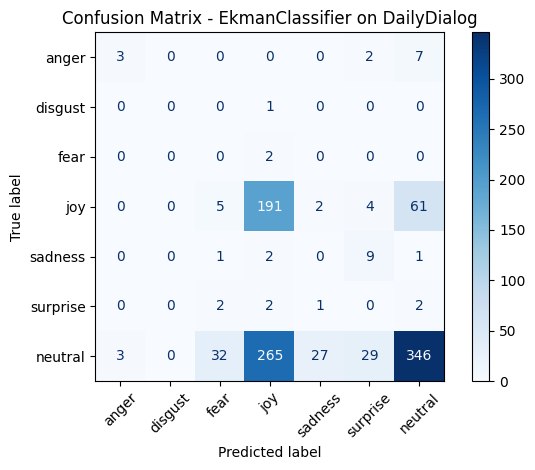


Accuracy: 0.5400

Distribusi Prediksi Emosi (Ekman labels):

anger     : 6
disgust   : 0
fear      : 40
joy       : 463
sadness   : 30
surprise  : 44
neutral   : 417


In [ ]:
# Classification Report
target_names = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - EkmanClassifier on DailyDialog")
plt.tight_layout()
plt.show()

# Additional metrics: Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Distribusi label yang diprediksi
ekman_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
pred_counts = Counter(y_pred)

print("\nDistribusi Prediksi Emosi (Ekman labels):\n")
for idx, label in enumerate(ekman_labels):
    print(f"{label:<10}: {pred_counts[idx]}")


=== Classification Report ===
              precision    recall  f1-score   support

       anger       0.50      0.25      0.33        12
     disgust       0.00      0.00      0.00         1
        fear       0.00      0.00      0.00         2
         joy       0.41      0.73      0.53       263
     sadness       0.00      0.00      0.00        13
    surprise       0.00      0.00      0.00         7
     neutral       0.83      0.49      0.62       702

    accuracy                           0.54      1000
   macro avg       0.25      0.21      0.21      1000
weighted avg       0.70      0.54      0.58      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


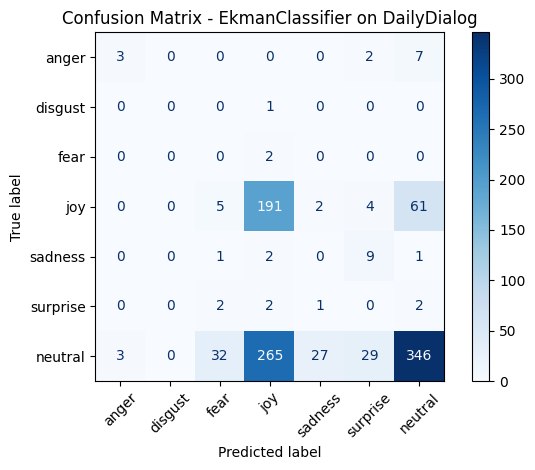


Accuracy: 0.5400

Distribusi Prediksi Emosi (Ekman labels):

anger     : 6
disgust   : 0
fear      : 40
joy       : 463
sadness   : 30
surprise  : 44
neutral   : 417


In [ ]:
# Jika y_true dan y_pred tidak kosong, lanjutkan evaluasi
if y_true and y_pred:
    # Classification Report
    target_names = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
    print("\n=== Classification Report ===")
    print(classification_report(y_true, y_pred, target_names=target_names))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title("Confusion Matrix - EkmanClassifier on DailyDialog")
    plt.tight_layout()
    plt.show()

    # Additional metrics: Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")

    # Distribusi label yang diprediksi
    ekman_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
    pred_counts = Counter(y_pred)

    print("\nDistribusi Prediksi Emosi (Ekman labels):\n")
    for idx, label in enumerate(ekman_labels):
        print(f"{label:<10}: {pred_counts[idx]}")
else:
    print("Error: No data in evaluation.")

In [ ]:
from datasets import load_dataset
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from tqdm.auto import tqdm
from collections import Counter

# Initialize model pipeline for emotion classification
ekman = pipeline('sentiment-analysis', model='arpanghoshal/EkmanClassifier', device=0)  # Using GPU

# Load the validation dataset
ds = load_dataset("li2017dailydialog/daily_dialog", split="validation")

# Track true labels and predictions
y_true = []
y_pred = []

# Function to split text into manageable chunks (<= 512 tokens)
def split_into_chunks(text, max_len=512):
    tokens = text.split()  # Split by whitespace into words
    for i in range(0, len(tokens), max_len):
        yield " ".join(tokens[i:i + max_len])

# Function to preprocess each dialogue and its emotion labels
def preprocess_dialog(dialog, emotion):
    text = " ".join(dialog)  # Join the dialogue into a single text
    emotion_map = {
        0: "neutral", 1: "anger", 2: "disgust", 3: "fear",
        4: "joy", 5: "sadness", 6: "surprise"
    }
    true_labels = [emotion_map[emo] for emo in emotion]  # Convert emotion indices to labels
    return text, true_labels

# Process each dialogue in the dataset
for i, (dialog, emotion) in enumerate(zip(ds["dialog"], ds["emotion"])):
    # Debugging: Print progress every 100 samples
    if i % 100 == 0:
        print(f"Processing sample {i + 1}/{len(ds)}")

    # Preprocess the dialogue and its corresponding emotion labels
    text, true_labels = preprocess_dialog(dialog, emotion)

    # Add true labels to y_true
    y_true.extend(true_labels)

    # Store the predictions for this dialogue
    chunk_preds = []

    for chunk in split_into_chunks(text):
        # Tokenize and process each chunk
        result = ekman(chunk)
        emotion = result[0]['label']
        chunk_preds.append(emotion)

    # Majority voting for the final predicted emotion for this dialogue
    most_common_emotion = Counter(chunk_preds).most_common(1)[0][0]
    y_pred.append(most_common_emotion)

# Check if the lengths of y_true and y_pred match
print(f"Number of true labels (y_true): {len(y_true)}")
print(f"Number of predicted labels (y_pred): {len(y_pred)}")

# If mismatch, debug further
if len(y_true) != len(y_pred):
    print(f"Warning: Length mismatch detected! {len(y_true)} true labels and {len(y_pred)} predicted labels.")
else:
    print("Both y_true and y_pred have the same length. Proceeding with evaluation.")

    # Print distribution of predicted emotions
    ekman_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
    pred_counts = Counter(y_pred)
    print("\nDistribusi Prediksi Emosi (Ekman labels):\n")
    for label in ekman_labels:
        print(f"{label:<10}: {pred_counts[label]}")

    # Classification report
    from sklearn.metrics import classification_report
    print("\n=== Classification Report ===")
    print(classification_report(y_true, y_pred, target_names=ekman_labels))


Device set to use cuda:0


Processing sample 1/1000


Token indices sequence length is longer than the specified maximum sequence length for this model (541 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (541) must match the size of tensor b (512) at non-singleton dimension 1

Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

575615